In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
dataset = pd.read_csv("student_scores.csv")
print("student scores dataset: ")
dataset.head()

student scores dataset: 


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [22]:
dataset.isnull ==True 

False

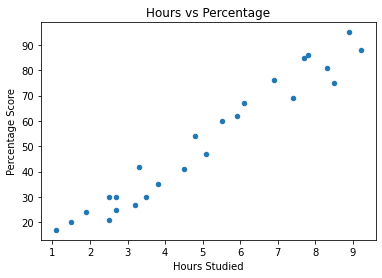

In [23]:
dataset.plot.scatter(x='Hours', y='Scores', style='1')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

# Prepare The Data

In [24]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
#print(x)

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.7, random_state = 0)

# Training the Model

In [26]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(x_train, y_train)

print('Training Completed')

Training Completed


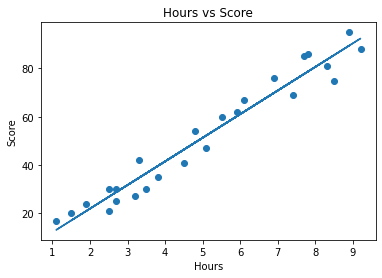

In [27]:
regression_line = regressor.coef_*x+regressor.intercept_

plt.scatter(x,y)
plt.plot(x, regression_line)
plt.title('Hours vs Score')
plt.xlabel('Hours')
plt.ylabel('Score');
plt.show()

# Testing the Model

In [28]:
print(x_test)
print("Prediction of the score: ")
y_pred = regressor.predict(x_test)
print(y_pred)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]
Prediction of the score: 
[17.05366541 33.69422878 74.80620886 26.8422321  60.12335883 39.56736879
 20.96909209 78.72163554]


In [29]:
df = pd.DataFrame({'Actual Score': y_test, 'Predicted Score': y_pred})

df

,Actual Score,Predicted Score
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [32]:
hours = np.array([9.25])
hours = hours.reshape(-1,1)
our_pred = regressor.predict(hours)

print("Number of Hours = {}".format(float(hours)))
print("Predicted Score = {}".format(round(our_pred[0],3)))

Number of Hours = 9.25
Predicted Score = 92.915


# Checking Accuracy of the Model


In [34]:
from sklearn import metrics

mae = metrics.mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error:', mae)

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', rmse)

Mean Absolute Error: 4.419727808027652
Root Mean Squared Error: 4.792191274636315
